In [4]:
import os.path
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import config
from data import Original

filename = config.DP_CONFIG["filename"]
filedir = config.DP_CONFIG["filedir"]
outputdir = config.DP_CONFIG["output_file_directory"]
categorical_columns = config.DP_CONFIG["categorical_columns"]
epsilon_list = config.DP_CONFIG["epsilon_list"]
label_filename = config.DP_CONFIG["label_filename"]

files = ["categorical_results.pkl", 
        "continuous_results.pkl",
        "model_results.pkl"]

original = Original(filedir, filename, categorical_columns)

results = []
for i, file in enumerate(files):
    full_file_name = os.path.join(outputdir, file)
    with open(full_file_name, "rb") as f:
       results.append(pickle.load(f))

epsilon_df = pd.DataFrame({"epsilon":epsilon_list})
categorical_metric_df = pd.concat([epsilon_df, pd.DataFrame(results[0], columns= original.categorical_columns)], axis = 1)
continuous_metric_df =pd.concat([epsilon_df, pd.DataFrame(results[1], columns= original.continuous_columns)], axis = 1)
model_metric_df = pd.DataFrame(results[2])


ValueError: 7 columns passed, passed data had 1 columns

In [5]:
categorical_df_melt = categorical_metric_df.melt(id_vars = ["epsilon"], value_vars = original.categorical_columns)
continuous_df_melt = continuous_metric_df.melt(id_vars = ["epsilon"], value_vars = original.continuous_columns)
model_df_melt = model_metric_df.melt(id_vars = ["epsilon"], value_vars = ["accuracy"])

No handles with labels found to put in legend.


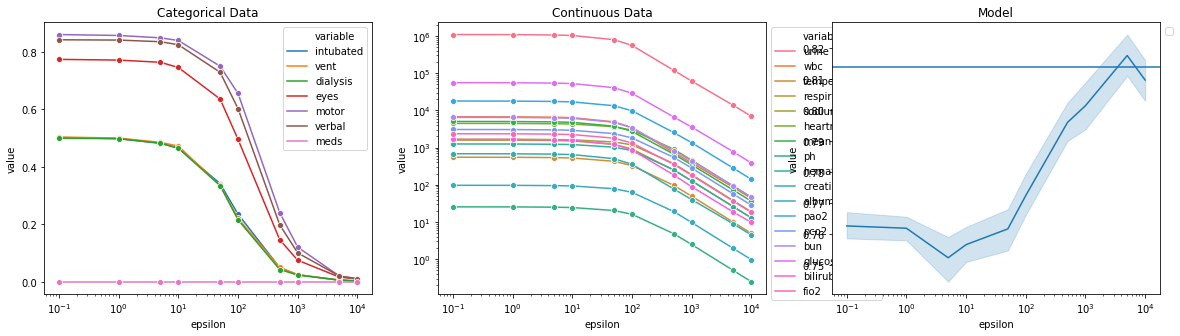

In [6]:
fig, axs = plt.subplots(ncols = 3, figsize =(20, 5))
sns.lineplot(x = "epsilon", 
            y = "value", 
            hue = "variable", 
            marker = "o", 
            dashes = False, 
            data = categorical_df_melt[categorical_df_melt["epsilon"] > 0], 
            ax = axs[0],
            legend = "brief")
axs[0].set_xscale("log")
axs[0].set_title("Categorical Data")

sns.lineplot(x = "epsilon", 
            y = "value", 
            marker = "o", 
            hue = "variable",
            dashes = False, 
            data = continuous_df_melt[continuous_df_melt["epsilon"] > 0], 
            ax = axs[1],
            legend = "brief")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_title("Continuous Data")
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

sns.lineplot(data = model_df_melt[model_df_melt["epsilon"] > 0], x= "epsilon", y = "value", err_style = "band")
axs[2].axhline(model_df_melt[model_df_melt["epsilon"] == 0]["value"].mean())
axs[2].set_xscale("log")
axs[2].set_title("Model")
axs[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()